In [1]:
# 使用pandas进行数据 
import pandas as pd
# 读取数据，展示前5行
pd.set_option('display.max_rows',None)
features = pd.read_csv('temp.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [2]:
print('The shape of our features is:', features.shape)

The shape of our features is: (348, 12)


In [3]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [4]:
# 使用 pandas get_dummies进行one hot编码
features = pd.get_dummies(features)
# 显示最后12列的前5行
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [5]:
# 使用numpy将数据转化为数组
import numpy as np
#labels是我们要预测的值 
labels = np.array(features['actual'])
# 从特征中删除标签
# axis 1 指的是列
features= features.drop('actual', axis = 1)
# 保存特征名称供以后使用
feature_list = list(features.columns)
# 转化为numpy 数组 
features = np.array(features)

In [6]:
# 使用Skicit-learn 将数据分为训练集和测试集
from sklearn.model_selection import train_test_split
# 将数据分为训练集和测试集
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [7]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


In [8]:
# 历史均值即预测基准
baseline_preds = test_features[:, feature_list.index('average')]
# 基准误差, 基准误差均值
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


In [9]:
from sklearn.ensemble import RandomForestRegressor   #### 树木个数设置为10时
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [10]:
# 对测试集做出预测
predictions = rf.predict(test_features)
# 计算绝对误差
errors = abs(predictions - test_labels)
# 计算绝对误差
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4.22 degrees.


In [11]:
# 计算平均绝对百分比误差
mape = 100 * (errors / test_labels)
# 计算并且显示精度
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.38 %.


In [19]:
# 导入库文件
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

from IPython.display import Image 
import pydotplus

# 从森林中输出挑选一个树
tree = rf.estimators_[5]

# 输出图片到dot文件
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# 使用dot文件构造图

graph= pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# 将图存入png文件
graph.write_png('tree.png')

True

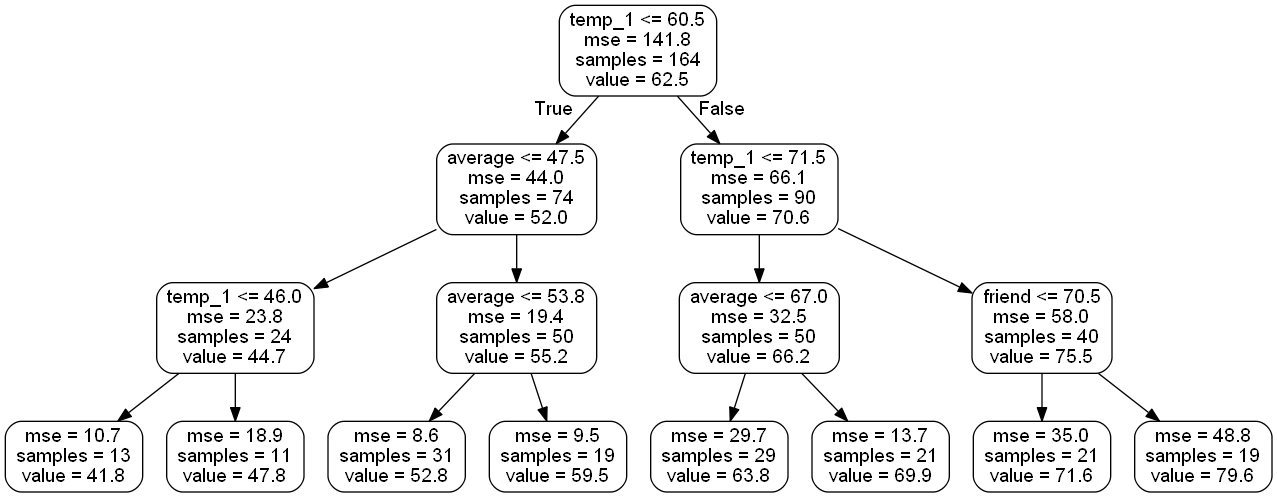

In [13]:
#限制树深度为3
import pydot
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# 提取最小的树
tree_small = rf_small.estimators_[5]
#保存图片
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph= pydotplus.graph_from_dot_file('small_tree.dot')
Image(graph.create_png())
#graph.write_png('small_tree.png');

In [14]:
# 获取数字特征重要性
importances = list(rf.feature_importances_)
# 具有变量和重要性的元组列表
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# 首先将重要特征重要性排序
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair)) 

Variable: temp_1               Importance: 0.78
Variable: average              Importance: 0.07
Variable: forecast_under       Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_acc         Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: forecast_noaa        Importance: 0.01
Variable: week_Sat             Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [15]:
# 只有两个重要变量的新的随机森林
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
#提取两个最重要的特征
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# 训练随机森林
rf_most_important.fit(train_important, train_labels)
# 做出预测并确定错误
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# 显示性能指标
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


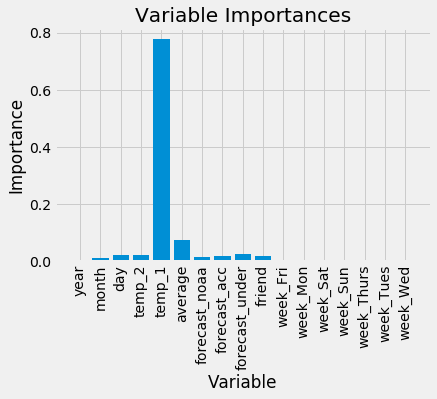

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# X轴要显示的内容
x_values = list(range(len(importances)))
# 制作条形图表
plt.bar(x_values, importances, orientation = 'vertical')
# x 轴标签
plt.xticks(x_values, feature_list, rotation='vertical')
# 图名
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');



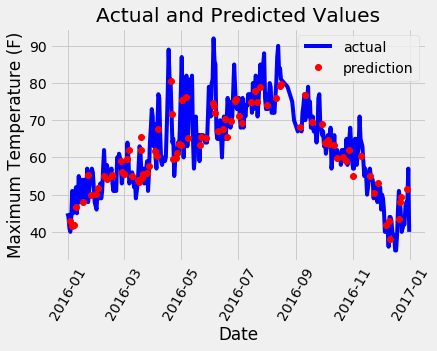

In [17]:
import datetime
# 训练值的日期
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# 实际值和日期值的dataframe
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# 预测日期
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# 日期列
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# 转换日期值
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# 预测值和日期值得dataframe
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# 绘制实际数据
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# 绘制预测数据
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# 图标签
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

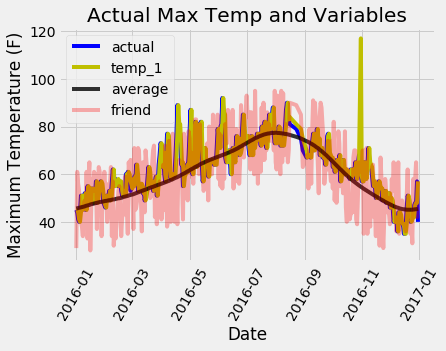

In [18]:
# 将数据转换为可以绘图的形式
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]
# 线性绘制所有数据
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)
plt.legend(); plt.xticks(rotation = '60');
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');